# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#QUESTION 1:
df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
#df.head()

#replacing the comma in the price column and converting it to numeric values, if there are invalid parsing, it will be set as NaN
df["Price"] = df["Price"].astype(str).str.replace(",", "")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

#checking for missing values in the price column and summing them up
df["Price"].isna().sum()

"""Explanation: I first converted the price column to string type to ensure that the replace method works correctly. Then, I used 
the str.replace() method to remove the commas from the price values. Finally, I converted the cleaned price values back to numeric 
type using pd.to_numeric(), setting errors="coerce" to handle any invalid parsing by converting them to NaN. At the end you can see that 
there are 0 missing values in the price column."""

'Explanation: I first converted the price column to string type to ensure that the replace method works correctly. Then, I used \nthe str.replace() method to remove the commas from the price values. Finally, I converted the cleaned price values back to numeric \ntype using pd.to_numeric(), setting errors="coerce" to handle any invalid parsing by converting them to NaN. At the end you can see that \nthere are 0 missing values in the price column.'

In [117]:
#QUESTION 1 continued:
df_cop = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin1")
#df_cop.head()

#replacing "Y" with "Yes" and "N" with "No" in the subject_injury column
df_cop["subject_injury"] = df_cop["subject_injury"].replace({"Y":"Yes", "N":"No"})

#getting proportion of of values missing before manipulation 
prop_missing = df_cop["subject_injury"].isna().mean()
print(prop_missing)

"""Explanation: The proportion of the values missing in the subject_injury column is approximately 0.7619, meaning that about 
76.19% of the observations do not contain recorded injury information."""

#creating a new column to fill missing values with "Missing" instead of having NaN
df_cop["subject_injury_clean"] = df_cop["subject_injury"].fillna("Missing")
cross_tab = pd.crosstab(df_cop["force_type"], df_cop["subject_injury_clean"])
cross_tab

"""Explanation: There appears to be a pattern in the missing data across force types. Bodily force and chemical irritants have a higher number of 
missing injury values, which may reflect differences in how injuries are assessed or reported across these force types."""


0.7619342359767892


'Explanation: There appears to be a pattern in the missing data across force types. Bodily force and chemical irritants have a higher number of \nmissing injury values, which may reflect differences in how injuries are assessed or reported across these force types.'

In [118]:
#QUESTION 1 continued:
df_meta = pd.read_csv("data/metabric.csv", encoding="latin1")
#df_meta.head()

#mapping the Overall Survival Status to numerical dummy values, 0 for deceased and 1 for living
df_meta["Survival_Dummy"] = df_meta["Overall Survival Status"].map({
    "0:LIVING": 1,
    "1:DECEASED": 0
})

#checking if the mapping was successful
df_meta[["Overall Survival Status", "Survival_Dummy"]].head()


,Overall Survival Status,Survival_Dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


In [119]:
#QUESTION 1 continued:

#loading the airbnb_NYC dataset again and checking for missing values in the Review Scores Rating column
df = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
df["Review Scores Rating"].isna().sum()

"""Explanation: There are 8323 missing values in the Review Scores Rating column of the airbnb_NYC dataset."""

#calculating the median of the Review Scores Rating column, ignoring NaN values
median_rating = df["Review Scores Rating"].median()
median_rating

"""Explanation: The median of the Review Scores Rating column is 94.0."""

#creating a new column where missing values in Review Scores Rating are imputed with the median value
df["Review Scores Rating Imputed"] = df["Review Scores Rating"].fillna(median_rating)

#checking for missing values in the new imputed column, it should be 0
df["Review Scores Rating Imputed"].isna().sum()

"""Explanation: Imputing the missing values with the median can cause the relationships between the variables of interest to be distorted
because if you graph the data, it can cause a spike at the median value, which can misrepresent the true distribution of the data and lead to 
inaccurate conclusions in the analysis."""


'Explanation: Imputing the missing values with the median can cause the relationships between the variables of interest to be distorted\nbecause if you graph the data, it can cause a spike at the median value, which can misrepresent the true distribution of the data and lead to \ninaccurate conclusions in the analysis.'

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Year range: 0 to 2026


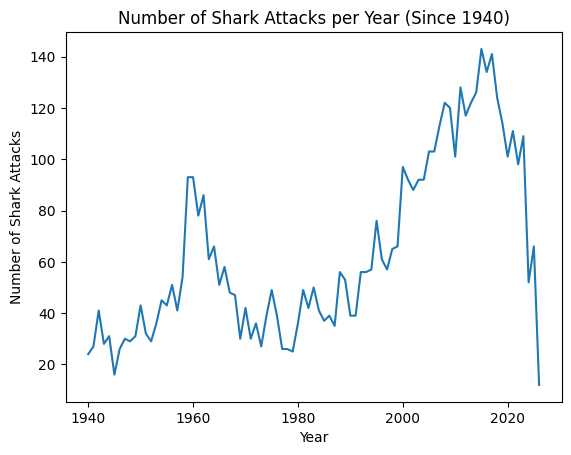

'Explanation: Overall, the attacks are increasing over time, although there has been a steep decline in shark attacks beginning 2015.'

In [120]:
# QUESTION 2:

import pandas as pd
df = pd.read_excel("data/GSAF5.xls")
#df.head()
"""Explanation: I needed to load the dataset using pd.read_excel() instead of pd.read_csv() because the file is in Excel format (.xls) rather than CSV format."""

df_columns = df.columns.astype(str).str.strip()
df_cleaned = df.dropna(axis=1, how="all")
#df_cleaned.head()

"""Explanation: An observation represents a specific shark attack incident recorded as a single row in the dataset given. 
Each row contains information describing one case: date, location, type of attack, and whether it was fatal or not. 
These observations allow us to analyze relationships between features and identify patterns across each incident.
This affects my choices in cleaning and analyzing the data because removing rows with missing values would remove an 
entire observation, which could skew the results and reduce the accuracy of the conclusions I come up with."""

# Cleaning the year column by converting it to numeric values, coercing errors to NaN, and then dropping rows with NaN values 
# in the Year column
df_cleaned["Year"] = pd.to_numeric(df_cleaned["Year"], errors="coerce")
df_cleaned = df_cleaned.dropna(subset=["Year"])
df_cleaned["Year"] = df_cleaned["Year"].astype(int)

# Describe range of values in the Year column
print("Year range:", df_cleaned["Year"].min(), "to", df_cleaned["Year"].max())

# Filter rows since 1940
attacks_1940 = df_cleaned[df_cleaned["Year"] >= 1940]

# Count attacks per year since 1940
attacks_per_year = attacks_1940["Year"].value_counts().sort_index()

# Plot attacks over time
attacks_per_year.plot()

plt.title("Number of Shark Attacks per Year (Since 1940)")
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")

plt.show()

"""Explanation: Overall, the attacks are increasing over time, although there has been a steep decline in shark attacks beginning 2015."""

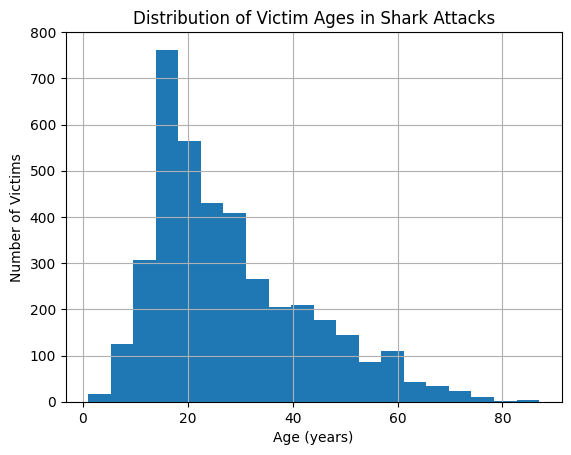

In [121]:
#QUESTION 2 continued: 
# Clean Age column by converting to numeric values, coercing errors to NaN
df_cleaned["Age"] = pd.to_numeric(df_cleaned["Age"], errors="coerce")

# Plot histogram
df_cleaned["Age"].hist(bins=20)

plt.title("Distribution of Victim Ages in Shark Attacks")
plt.xlabel("Age (years)")
plt.ylabel("Number of Victims")
plt.show()

In [122]:
#QUESTION 2 continued: 

# Clean Type variable
temp = (df_cleaned["Type"].astype(str).str.strip().str.lower())

df_cleaned["Type_clean"] = np.select([temp.str.contains("unprovoked", na=False),temp.str.contains("provoked", na=False)],
    ["Unprovoked","Provoked"],default="Unknown")

# Proportion unprovoked among known attack types
known = df_cleaned["Type_clean"].isin(["Unprovoked", "Provoked"])
proportion_unprovoked = (df_cleaned.loc[known, "Type_clean"] == "Unprovoked").mean()

print("Unprovoked shark attacks in known attack types are:", proportion_unprovoked)

# Proportion unprovoked including unknowns
proportion_unprovoked_overall = (df_cleaned["Type_clean"] == "Unprovoked").mean()
print("Unprovoked shark attacks including unknown attack types are:", proportion_unprovoked_overall)

"""Explanation: The proportion of unprovoked shark attacks among known attack types is approximately 0.8903, meaning that about 89.03% of the known shark attacks are 
unprovoked. When including unknown attack types, the proportion of unprovoked shark attacks decreases to approximately 0.7388, indicating that about 73.88% of all shark 
attacks (including unknown types) are unprovoked"""

Unprovoked shark attacks in known attack types are: 0.8902709149769978
Unprovoked shark attacks including unknown attack types are: 0.738829185520362


'Explanation: The proportion of unprovoked shark attacks among known attack types is approximately 0.8903, meaning that about 89.03% of the known shark attacks are \nunprovoked. When including unknown attack types, the proportion of unprovoked shark attacks decreases to approximately 0.7388, indicating that about 73.88% of all shark \nattacks (including unknown types) are unprovoked'

In [123]:
#QUESTION 2 continued: 

#Summing the Fatal Y/N column value counts and missing values
print(df['Fatal Y/N'].value_counts())
print(df['Fatal Y/N'].isna().sum())

#Cleaning the Fatal Y/N column and creating a new column Fatal_tidy
def cleaning_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower().strip()
    if x == 'unknown' or x == 'nan':
        return 'Unknown'
    elif 'y' in x or x == 'f':
        return 'Y'
    elif 'n' in x:
        return 'N'
    else:
        return 'Unknown'
df['Fatal_tidy'] = df['Fatal Y/N'].apply(cleaning_fatal)
print(df['Fatal_tidy'].value_counts())

Fatal Y/N
N          4933
Y          1488
UNKNOWN      71
 N            7
F             5
M             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64
561
Fatal_tidy
N          4943
Y          1495
Unknown     636
Name: count, dtype: int64


In [130]:
# Ensure Fatal_clean column exists in df_cleaned
def cleaning_fatal(x):
    if pd.isna(x):
        return 'Unknown'
    x = str(x).lower().strip()
    if x == 'unknown' or x == 'nan':
        return 'Unknown'
    elif 'y' in x or x == 'f':
        return 'Y'
    elif 'n' in x:
        return 'N'
    else:
        return 'Unknown'

df_cleaned["Fatal_clean"] = df_cleaned["Fatal Y/N"].apply(cleaning_fatal)

sub = df_cleaned[
    df_cleaned["Type_clean"].isin(["Provoked", "Unprovoked"]) &
    df_cleaned["Fatal_clean"].isin(["Y", "N"])
].copy()

sub["Fatal_binary"] = sub["Fatal_clean"].map({"Y": 1, "N": 0})

fatal_rate = sub.groupby("Type_clean")["Fatal_binary"].mean()
print("Fatality rate by attack type:")
print(fatal_rate)

print("\nCounts:")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"]))

print("\nRow proportions (within each Type):")
print(pd.crosstab(sub["Type_clean"], sub["Fatal_clean"], normalize="index"))


"""Explanation: Based on the data, it seems like unprovoked attacks tend to have more fatalities. I think this is because victims are 
unprepared when caught by suprise leading to more deaths."""

Fatality rate by attack type:
Type_clean
Provoked      0.033071
Unprovoked    0.246602
Name: Fatal_binary, dtype: float64

Counts:
Fatal_clean     N     Y
Type_clean             
Provoked      614    21
Unprovoked   3880  1270

Row proportions (within each Type):
Fatal_clean         N         Y
Type_clean                     
Provoked     0.966929  0.033071
Unprovoked   0.753398  0.246602


'Explanation: Based on the data, it seems like unprovoked attacks tend to have more fatalities. I think this is because victims are \nunprepared when caught by suprise leading to more deaths.'

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Question 1: 
This paper is about how you can tidy data in a much more efficient and simple way using tools for both input and outputs of the dataset. 

Question 2: 
The tidy data standard is intended to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together. 

Question 3: 
I think that it is saying that it is really easy to initially name the different variables and collect data for the dataset, however, making sure that the data is formatted in a way that makes the most sense to the user is the hard part. For example, reorganizing the rows and the columns to highlight a specific feature as a row or changing the data type of the data from a string to a numeric value for further exploration. 

Question 4:
Wickham defines values as the collection of data from the dataset which is either in quantitative or qualitative form. He says variables contain all values that measure the same underlying attribute (like height, temperature, and duration) across units. An observation contains all values measured on the same unit (like a person or day) across attributes. 

Question 5: 
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns, and tables are matched up with observations, variables, and types. 

Question 6: 
The five most common problems with messy datasets are: Column headers contain values instead of variable names, multiple variables are stored in a single column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored across multiple tables.
Table 4 is considered messy because income is divided and is stored as a multiple column features instead of being represented as values within a single income variable. This makes it difficult to analyze or compare data because each income range is treated as a separate column rather than part of the same variable. So, this is what "melting" the dataset is for. "Melting the dataset" means that we turn the column features into rows. 

Question 7: 
Table 11 is messy because each possible day in the month is stored as separate column features, even though they are really values of a single variable. This makes it hard to identify the different observations between each feature and find correlations that may be useful for what the user is looking for. 
Table 12 is molten and tidy because those day columns have been collapsed into rows, creating a single value column. This way there are not as many empty values in the columns and the data is a lot more easier to read and analyze. 


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

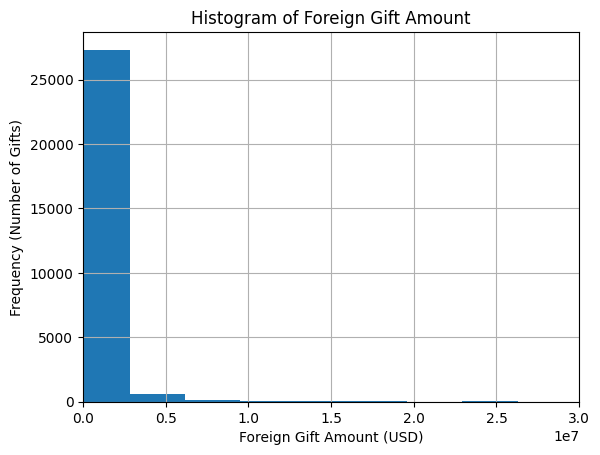

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


'Explanation: The most common gift type is "Contract" which constitutes approximately 0.6121 of the total gifts. The second most common\ngift type is "Monetary Gift" at about 0.3875. The remaining gift type is "Real Estate" that makes up a very small percentage of the total gifts,\nat around 0.0004.'

In [131]:
#QUESTION 4:

df_gift = pd.read_csv("data/ForeignGifts_edu.csv", encoding="latin1")
#df_gift.head()

import matplotlib.pyplot as plt
df_gift["Foreign Gift Amount"].dropna().hist(bins=30)

plt.title("Histogram of Foreign Gift Amount")
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Frequency (Number of Gifts)")

#This limits the x-axis to better visualize the distribution
plt.xlim(0, 3e7)
plt.show()

"""Explanation: The histogram of the Foreign Gift Amount variable shows a heavily right-skewed distribution and appears to be unimodal, 
indicating a single peak. Most foreign gifts are concentrated at lower dollar amounts, with the center of the distribution occurring at 
relatively small gift values. The gift amounts range from near $0 to approximately $27 million. The long right tail suggests the presence of 
several extremely large gifts that act as outliers."""

gift_type_counts = df_gift["Gift Type"].value_counts()
gift_type_counts
gift_type_props = df_gift["Gift Type"].value_counts(normalize=True)
print(gift_type_props)

"""Explanation: The most common gift type is "Contract" which constitutes approximately 0.6121 of the total gifts. The second most common
gift type is "Monetary Gift" at about 0.3875. The remaining gift type is "Real Estate" that makes up a very small percentage of the total gifts,
at around 0.0004."""

In [132]:
#QUESTION 4 continued:

import matplotlib.pyplot as plt

#countries with the most gifts
top_countries_count = (df_gift.groupby("Country of Giftor").size().sort_values(ascending=False).head(15))
print(top_countries_count)

#total amount of gifts given by the top 15 countries
top_countries_amount = (df_gift.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print(top_countries_amount)

"""Explanation: The top 15 countries in terms of the number of gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France,
Germany, Hong Kong, South Korea, Qatar, Netherlands, Korea, India, and Taiwan. The top 15 countries in terms of the amount given are Qatar, England, 
China, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia."""

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


'Explanation: The top 15 countries in terms of the number of gifts are England, China, Canada, Japan, Switzerland, Saudi Arabia, France,\nGermany, Hong Kong, South Korea, Qatar, Netherlands, Korea, India, and Taiwan. The top 15 countries in terms of the amount given are Qatar, England, \nChina, Saudi Arabia, Bermuda, Canada, Hong Kong, Japan, Switzerland, India, Germany, United Arab Emirates, France, Singapore, and Australia.'

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


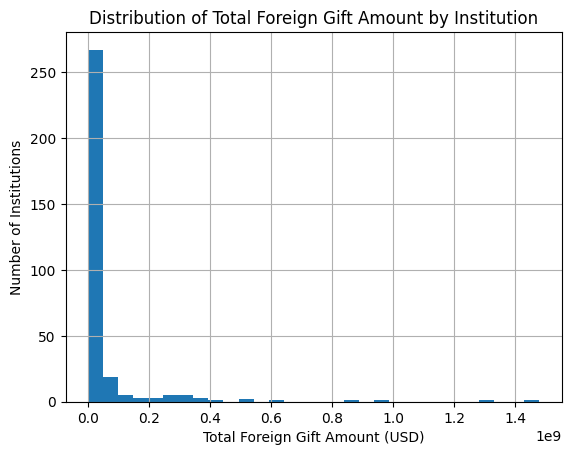

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64


'Explanation: The giftors providing the largest total monetary contributions seems to be from the Qatar Foundation as it holds the top 3 places. Other major contributors include \nthe Saudi Arabian Cultural Mission, HCL, the Church of Jesus Christ of LDS, and the Emirates Institute for Advanced Sc.'

In [133]:
# QUESTION 4 continued: 
top_institutions = (df_gift.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))
print(top_institutions)

"""Explanation: The top 15 institutions in terms of total foreign gift amount are Carnegie Mellon University,Cornell University, Harvard University, Massachusetts Institute of Technology, 
Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown University, University of Chicago, University of Colorado Boulder,
Duke University, Brigham Young University, Stanford University,and University of Texas MD Anderson Cancer Center."""

institution_totals = (df_gift.groupby("Institution Name")["Foreign Gift Amount"].sum()) 
institution_totals.hist(bins=30)

plt.title("Distribution of Total Foreign Gift Amount by Institution")
plt.xlabel("Total Foreign Gift Amount (USD)")
plt.ylabel("Number of Institutions")
plt.show()

top_giftors = (df_gift.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(10))
print(top_giftors)

"""Explanation: The giftors providing the largest total monetary contributions seems to be from the Qatar Foundation as it holds the top 3 places. Other major contributors include 
the Saudi Arabian Cultural Mission, HCL, the Church of Jesus Christ of LDS, and the Emirates Institute for Advanced Sc."""

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [134]:
# QUESTION 5:
df_college = pd.read_csv("data/college_completion.csv", encoding="latin1")

df_college.head()
print("Observations:", df_college.shape[0])
print("Variables:", df_college.shape[1])

"""Explanation: The dataset contains 3798 observations and 63 variables."""

#Crosstab of control and level variables, including counts and row proportions
ct_counts = pd.crosstab(df_college["control"], df_college["level"], dropna=False)
ct_rowprops = pd.crosstab(df_college["control"], df_college["level"], normalize="index", dropna=False)

print("Crosstab counts (control x level):")
print(ct_counts)

print("Row proportions (within each control):")
print(ct_rowprops)

"""Explanation: Private not-for-profit institutions are mostly 4 year colleges, with 94.55% being 4 year programs. Public institutions, however, are more likely to 
be 2 year colleges, with around 59.44% being 2-year schools. Private for-profit institutions show a more balanced distribution between 2 year and 4 year programs being 46.88% and 53.12% 
respectively. Overall, the results show that private not-for-profit schools primarily focus on 4 year degree programs, while public institutions prioritize providing 2 year 
educational opportunities.""" 


Observations: 3798
Variables: 63
Crosstab counts (control x level):
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
Row proportions (within each control):
level                     2-year    4-year
control                                   
Private for-profit      0.468750  0.531250
Private not-for-profit  0.054487  0.945513
Public                  0.594352  0.405648


'Explanation: Private not-for-profit institutions are mostly 4 year colleges, with 94.55% being 4 year programs. Public institutions, however, are more likely to \nbe 2 year colleges, with around 59.44% being 2-year schools. Private for-profit institutions show a more balanced distribution between 2 year and 4 year programs being 46.88% and 53.12% \nrespectively. Overall, the results show that private not-for-profit schools primarily focus on 4 year degree programs, while public institutions prioritize providing 2 year \neducational opportunities.'

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


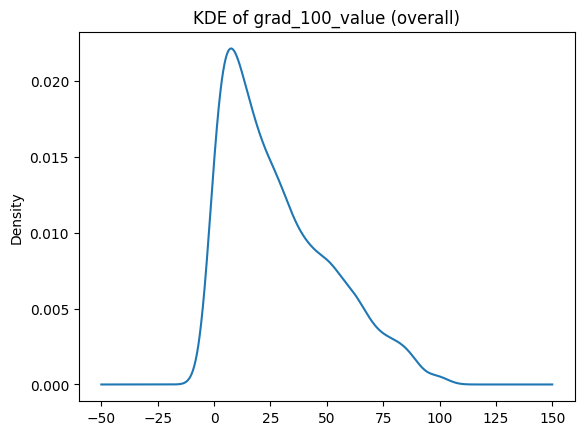

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


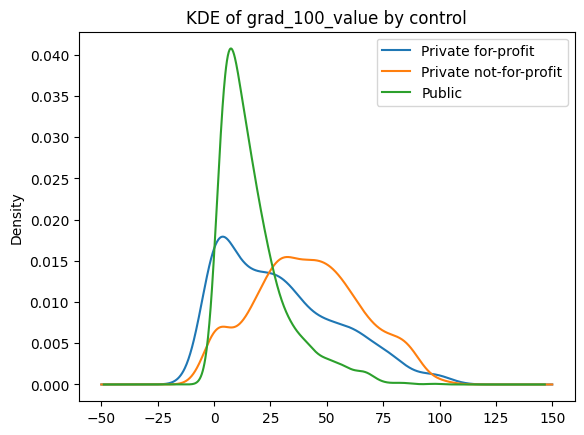

control
Private not-for-profit    41.0
Private for-profit        24.7
Public                    13.2
Name: grad_100_value, dtype: float64


'Explanation: The Private not-for-profit schools seem to have the highest median grad_100_value which means that they have the most favorable graduation rates.'

In [135]:
# QUESTION 5 continued:
#%pip install scipy

print(df_college["grad_100_value"].describe())
df_college["grad_100_value"].dropna().plot(kind="kde")
plt.title("KDE of grad_100_value (overall)")
plt.show()

print(df_college.groupby("control")["grad_100_value"].describe())
for ctrl, g in df_college.groupby("control"):
   g["grad_100_value"].dropna().plot(kind="kde", label=ctrl)
plt.title("KDE of grad_100_value by control")
plt.legend()
plt.show()

print(df_college.groupby("control")["grad_100_value"].median().sort_values(ascending=False))

"""Explanation: The Private not-for-profit schools seem to have the highest median grad_100_value which means that they have the most favorable graduation rates.""" 


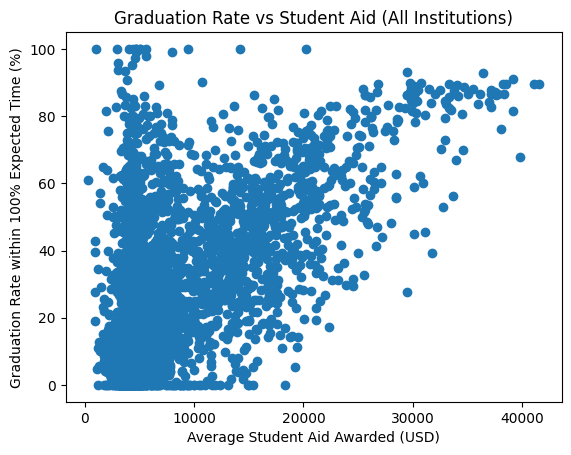

Overall covariance: 88610.4831690244
Overall correlation: 0.5758792845936064


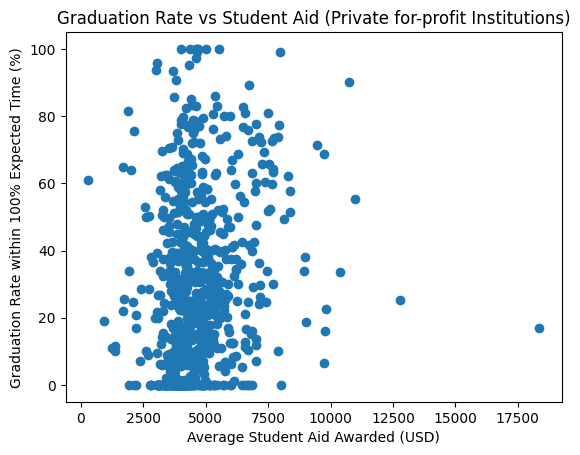

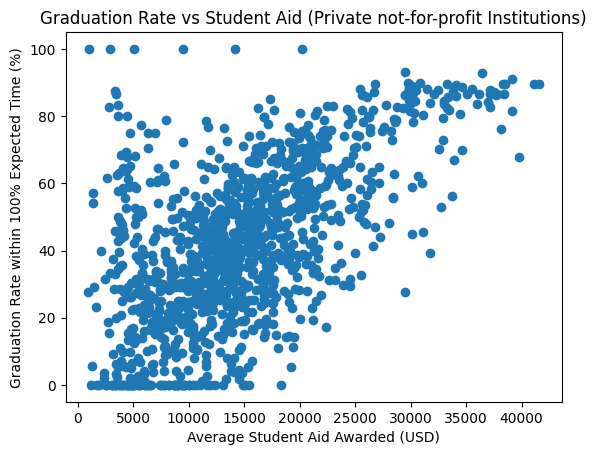

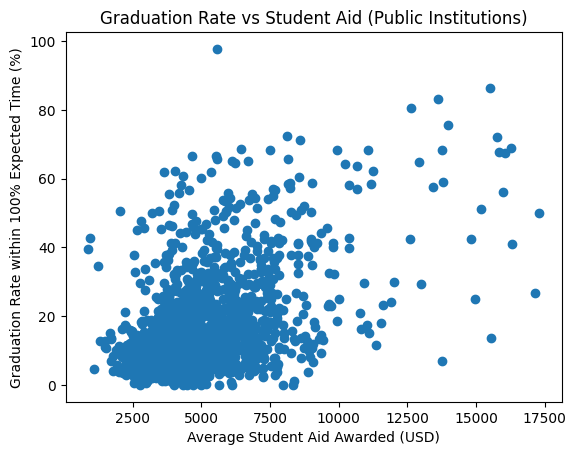

'Explanation: Overall, there is a general upward trend where graduation rates tend to increase as aid_value increases. When looking at control, private not-for-profit \ninstitutions show the strongest positive relationship between student aid and graduation rates. Public institutions also show a positive relationship, but it is not as strong. \nPrivate for-profit institutions show a positive trend as well, but it appears weaker compared to the other institution types.'

In [136]:
# QUESTION 5 continued:

#Convert aid_value to numeric, coercing errors to NaN
df_college["aid_value"] = pd.to_numeric(df_college["aid_value"], errors="coerce")

#keep only rows with both numbers
sub = df_college[["aid_value", "grad_100_value", "control"]].dropna().copy()

#Labeling scatterplot axes and title
plt.figure()
plt.scatter(sub["aid_value"], sub["grad_100_value"])
plt.xlabel("Average Student Aid Awarded (USD)")
plt.ylabel("Graduation Rate within 100% Expected Time (%)")
plt.title("Graduation Rate vs Student Aid (All Institutions)")
plt.show()

#Calculating covariance and correlation for the overall data
cov_overall = sub[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
corr_overall = sub[["aid_value", "grad_100_value"]].corr().iloc[0, 1]
print("Overall covariance:", cov_overall)
print("Overall correlation:", corr_overall)

#Plotting scatterplots and calculating covariance and correlation by control group
rows = []
for ctrl, g in sub.groupby("control"):
   plt.figure()
   plt.scatter(g["aid_value"], g["grad_100_value"])
   plt.xlabel("Average Student Aid Awarded (USD)")
   plt.ylabel("Graduation Rate within 100% Expected Time (%)")
   plt.title(f"Graduation Rate vs Student Aid ({ctrl} Institutions)")
   plt.show()

   cov = g[["aid_value", "grad_100_value"]].cov().iloc[0, 1]
   corr = g[["aid_value", "grad_100_value"]].corr().iloc[0, 1]
   rows.append([ctrl, len(g), cov, corr])

# Creating a new dataFrame to summarize the covariance and correlation by control group
stats_df = pd.DataFrame(rows, columns=["control", "n", "cov(aid,grad)", "corr(aid,grad)"]) \
           .sort_values("corr(aid,grad)", ascending=False)

"""Explanation: Overall, there is a general upward trend where graduation rates tend to increase as aid_value increases. When looking at control, private not-for-profit 
institutions show the strongest positive relationship between student aid and graduation rates. Public institutions also show a positive relationship, but it is not as strong. 
Private for-profit institutions show a positive trend as well, but it appears weaker compared to the other institution types."""


**UPLOADED ANSWERS ON GITHUB AS A PICTURE!!**
**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Look in question 6 folder

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [137]:
#QUESTION 7:
df_ames = pd.read_csv('data/ames_prices.csv', encoding = 'latin1')
df_ames.head()

df_completion = pd.read_csv('data/college_completion.csv', encoding = 'latin1')
df_completion.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


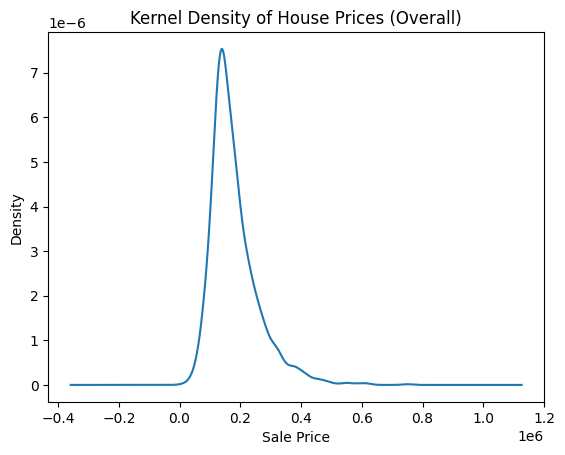

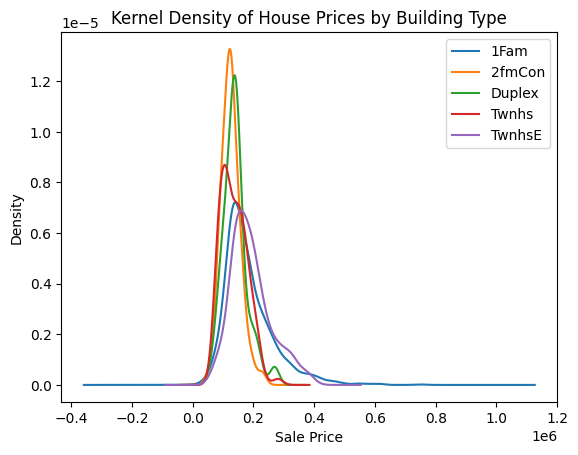

'Explanation: Single-family homes tend to have higher average prices and greater variability, while duplexes and town houses are more consistently priced in lower ranges.'

In [138]:
#QUESTION 7 continued:

# Overall KDE
df_ames["price"].dropna().plot(kind="kde")
plt.xlabel("Sale Price")
plt.title("Kernel Density of House Prices (Overall)")
plt.show()

# KDE by building type
for bldg, g in df_ames.groupby("Bldg.Type"):
    g["price"].dropna().plot(kind="kde", label=bldg)

plt.xlabel("Sale Price")
plt.title("Kernel Density of House Prices by Building Type")
plt.legend()
plt.show()

# Describe table by building type
df_ames.groupby("Bldg.Type")["price"].describe()

"""Explanation: Single-family homes tend to have higher average prices and greater variability, while duplexes and town houses are more consistently priced in lower ranges."""


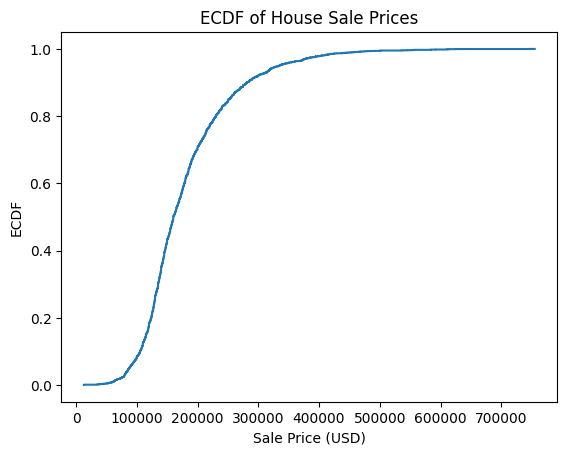

Five-number summary:
min     12789.0
25%    129500.0
50%    160000.0
75%    213500.0
max    755000.0
Name: price, dtype: float64


In [139]:
#QUESTION 7 continued:

# Drop missing prices
price = df_ames["price"].dropna().sort_values()

# ECDF
ecdf_y = np.arange(1, len(price)+1) / len(price)

plt.figure()
plt.step(price, ecdf_y)
plt.xlabel("Sale Price (USD)")
plt.ylabel("ECDF")
plt.title("ECDF of House Sale Prices")
plt.show()

# 5-number summary
five_num = price.describe()[["min", "25%", "50%", "75%", "max"]]
print("Five-number summary:")
print(five_num)

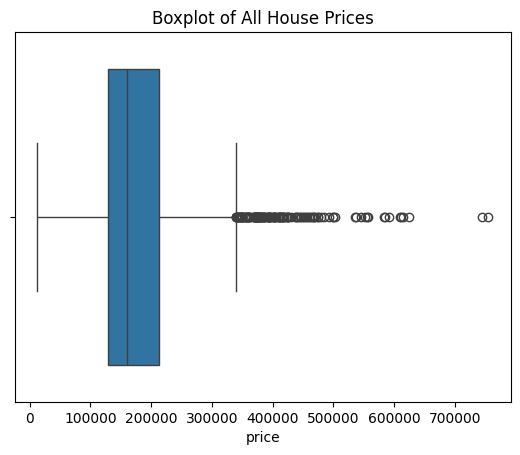

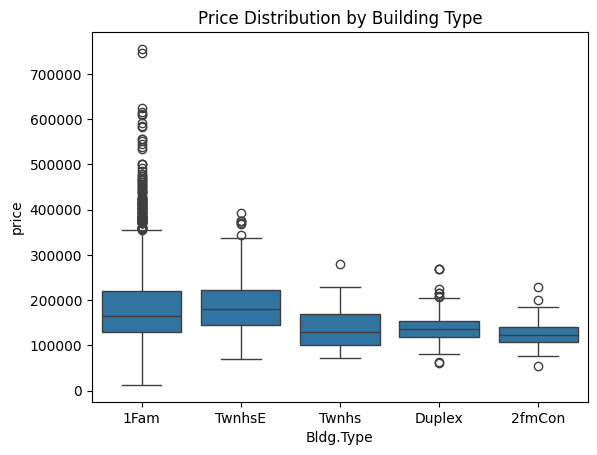

<Figure size 640x480 with 0 Axes>

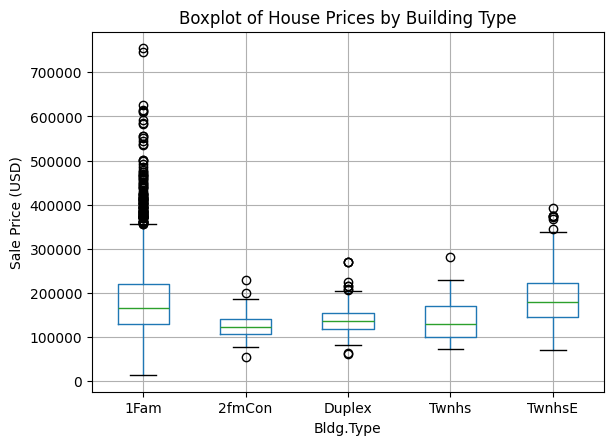

'Explanation: Yes, there are outliers in the overall boxplot of house prices, indicated by points that fall outside the whiskers of the boxplot. In the boxplot showcasing the overall \nhouse prices, there are a lot of outliers on the upper end showcased by the numerous points above the whiskers. In the boxplot below, we can see that single family homes (1Fam) tend to \nhave higher prices and significantly more variability compared to other building types. Overall, the main pattern is that building type clearly affects both the price and the spread \nof house prices, with single family homes showing the greatest variation and most extreme outliers.'

In [140]:
#QUESTION 7 continued:

# Boxplot of all prices
sns.boxplot(x=df_ames['price'])
plt.title('Boxplot of All House Prices')
plt.show()

sns.boxplot(data=df_ames, x='Bldg.Type', y='price')
plt.title('Price Distribution by Building Type')
plt.show()

# Boxplot by building type
plt.figure()
df_ames.boxplot(column="price", by="Bldg.Type")
plt.ylabel("Sale Price (USD)")
plt.title("Boxplot of House Prices by Building Type")
plt.suptitle("")
plt.show()

"""Explanation: Yes, there are outliers in the overall boxplot of house prices, indicated by points that fall outside the whiskers of the boxplot. In the boxplot showcasing the overall 
house prices, there are a lot of outliers on the upper end showcased by the numerous points above the whiskers. In the boxplot below, we can see that single family homes (1Fam) tend to 
have higher prices and significantly more variability compared to other building types. Overall, the main pattern is that building type clearly affects both the price and the spread 
of house prices, with single family homes showing the greatest variation and most extreme outliers."""

129500.0 213500.0
137


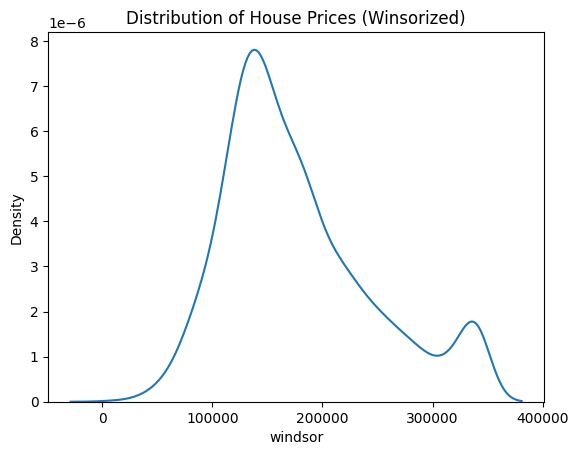

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: windsor, dtype: float64


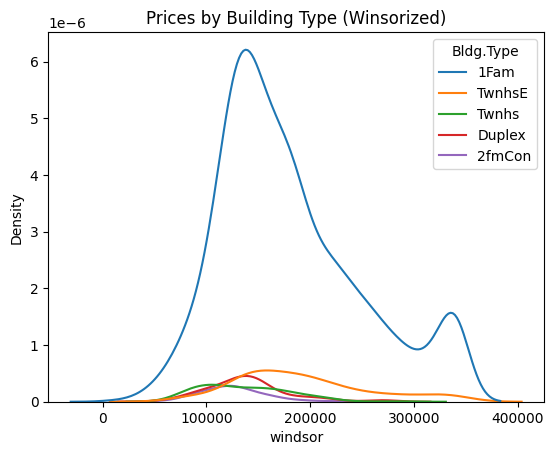

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,180417.359588,69177.514863,12789.0,130000.0,165000.0,220000.0,339500.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,191349.420601,63715.987930,71000.0,145000.0,180000.0,222000.0,339500.0


'Explanation: After winsorizing, extreme house prices are capped, so the distribution is less skewed and the long right tail is reduced. The overall shape stays similar,\n but variation decreases. By building type, the same patterns remain: single-family homes and end-unit townhomes are generally more expensive, while duplexes and two-family \n conversions are cheaper. Winsorizing mainly reduces the impact of outliers and makes comparisons across building types clearer.'

In [141]:
#QUESTION 7 continued:

# Creating dummy variable for outliers using IQR method
Q1 = df_ames['price'].quantile(0.25)
Q3 = df_ames['price'].quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

df_ames['outlier'] = (df_ames['price'] < lower_bound) | (df_ames['price'] > upper_bound)
print(df_ames['outlier'].sum())

#QUESTION 7 continued:
# create a copy of the price column
df_ames['windsor'] = df_ames['price']

#bounds for winsorization
df_ames.loc[df_ames['price'] > upper_bound, 'windsor'] = upper_bound
df_ames.loc[df_ames['price'] < lower_bound, 'windsor'] = lower_bound

sns.kdeplot(df_ames['windsor'])
plt.title('Distribution of House Prices (Winsorized)')
plt.show()
print(df_ames['windsor'].describe())

sns.kdeplot(data=df_ames, x='windsor', hue='Bldg.Type')
plt.title('Prices by Building Type (Winsorized)')
plt.show()

summary_by_type = df_ames.groupby('Bldg.Type')['windsor'].describe()
display(summary_by_type)

"""Explanation: After winsorizing, extreme house prices are capped, so the distribution is less skewed and the long right tail is reduced. The overall shape stays similar,
 but variation decreases. By building type, the same patterns remain: single-family homes and end-unit townhomes are generally more expensive, while duplexes and two-family 
 conversions are cheaper. Winsorizing mainly reduces the impact of outliers and makes comparisons across building types clearer."""